<a href="https://colab.research.google.com/github/ajitkumarkp/CV/blob/master/Instagram_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50,120,229)">Sample image Filters</font>

This notebook implements 2 instagram-like filters using opencv. 

1. Pencil Sketch Filter 
1. Cartoon Filter using 


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [ ]:
def cartoonify(image, arguments=0):
    
    Gblurred = cv2.GaussianBlur(image,(3,3),100,0)

    image_hsv = cv2.cvtColor(Gblurred, cv2.COLOR_BGR2HSV)

    image_h= image_hsv[...,0]
    image_s= image_hsv[...,1]
    image_v= image_hsv[...,2]
    
    # Laplacian kernel
    kernel = np.array((
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]), dtype="int")

    #Convert to Grayscale
    image_gray = cv2.cvtColor(Gblurred, cv2.COLOR_BGR2GRAY)

    # Using 2D filter convolution
    laplacian = cv2.filter2D(~image_gray, -1, kernel)

    # Do binary thresholding
    th, dst_bin_inv = cv2.threshold(laplacian, 3, 255, cv2.THRESH_BINARY_INV)

    PencilSketch = cv2.GaussianBlur(dst_bin_inv,(1,1),150,0)
    
    image_v = cv2.bitwise_and(image_v, PencilSketch)

    new_hsv = cv2.merge((image_h, image_s, image_v))

    cartoonImage = cv2.cvtColor(new_hsv, cv2.COLOR_HSV2BGR)

    return cartoonImage

In [ ]:
def pencilSketch(image, arguments=0):
    
    # Gaussian smoothing
    Gblurred = cv2.GaussianBlur(image,(3,3),100,100)
    
    #Convert to Grayscale
    image_gray = cv2.cvtColor(Gblurred, cv2.COLOR_BGR2GRAY)

    # Laplacian kernel
    kernel = np.array((
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]), dtype="int")

    # Using 2D filter convolution
    laplacian = cv2.filter2D(~image_gray, -1, kernel)

    # Do binary thresholding
    th, dst_bin_inv = cv2.threshold(laplacian, 3, 255, cv2.THRESH_BINARY_INV)

    PencilSketch = cv2.GaussianBlur(dst_bin_inv,(1,1),150,0)
    
    PencilSketch = cv2.merge((PencilSketch,PencilSketch,PencilSketch))
    
    return PencilSketch

In [ ]:
imagePath = "trump.jpg"
image = cv2.imread(imagePath)

pencilSketchImage = pencilSketch(image)
cartoonImage = cartoonify(image)


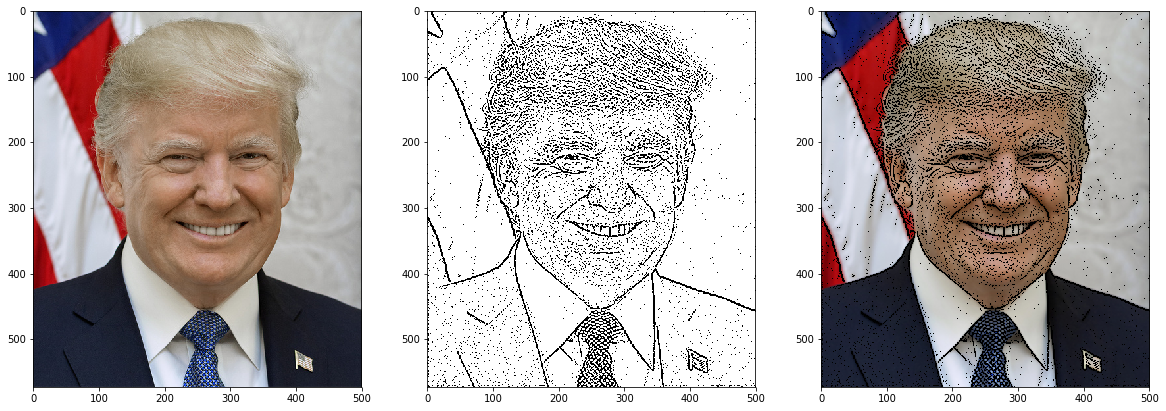

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(pencilSketchImage[:,:,::-1]);
plt.subplot(133);plt.imshow(cartoonImage[:,:,::-1]);
